In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('../../processed-data/tidy_socialmedia_data.csv', index_col=0)
data

,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,...,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU,full_count
1,115091,2017-05-02,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,...,61.0,64.0,68.0,50.0,56.0,73.0,66.0,39.0,38.0,10
2,115091,2017-05-02,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,...,57.0,70.0,58.0,37.0,56.0,67.0,0.0,27.0,23.0,10
3,115091,2017-05-02,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,...,44.0,70.0,67.0,26.0,38.0,39.0,63.0,34.0,36.0,10
4,115091,2017-05-02,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,...,56.0,79.0,89.0,30.0,20.0,60.0,67.0,29.0,23.0,10
6,115091,2017-05-02,Tuesday,20:02:12,Daily questions,6,1,1,1,5.0,...,0.0,27.0,83.0,15.0,3.0,25.0,16.0,0.0,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12241,9873359,2017-04-25,Tuesday,14:00:09,Daily questions,3,1,1,1,81.0,...,0.0,14.0,0.0,0.0,0.0,14.0,22.0,0.0,0.0,10
12242,9873359,2017-04-25,Tuesday,16:40:58,Daily questions,4,1,1,1,82.0,...,0.0,11.0,0.0,0.0,0.0,0.0,6.0,0.0,24.0,10
12243,9873359,2017-04-25,Tuesday,18:00:06,Daily questions,5,1,1,1,83.0,...,0.0,10.0,0.0,0.0,0.0,0.0,11.0,0.0,18.0,10
12244,9873359,2017-04-25,Tuesday,20:05:31,Daily questions,6,1,1,1,84.0,...,8.0,22.0,8.0,0.0,0.0,15.0,10.0,0.0,0.0,10


In [3]:
data['Date']= pd.to_datetime(data['Date'])

In [98]:
fields = ['Fatigue', 'LowMood', 'Loneliness', 'Concentrat', 'LossOfInt', 'Inferior', 'Hopeless', 'Stress', 'PSMU', 'News', 'ASMU']

df_means = pd.DataFrame(columns=fields)
df_stds = pd.DataFrame(columns=fields)
index = 0

for day in data.Day.unique():
    for field in fields:
        df_means.insert(index, field, data.groupby(["Day"])[field].mean(), True)
        df_stds.insert(index, field, data.groupby(["Day"])[field].std(), True)
        index += 1

dailyMeans = df_means.iloc[:,:11]
dailyStds = df_stds.iloc[:,:11]

In [12]:
# display(dailyMeans)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
dailyMeans = dailyMeans.loc[day_order]
display(dailyMeans)

,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU
Day,,,,,,,,,,,
Monday,36.924159,12.629601,11.849530,26.730829,26.284597,10.045383,11.810642,20.127543,31.351330,20.127543,20.938967
Tuesday,37.901090,14.028816,13.007788,28.777259,26.899533,11.042835,12.504673,21.544393,34.468847,21.568536,22.154206
Wednesday,35.921260,13.044094,11.908589,28.341483,25.293932,10.759464,12.523997,21.903861,33.434543,22.388013,23.830709
Thursday,36.904288,13.317485,12.235249,27.990031,24.122699,10.618098,12.099617,21.694253,32.003067,20.737931,22.977795
Friday,37.550336,13.229866,12.096396,26.039496,25.450882,10.803018,12.696309,20.811083,29.777498,20.538139,20.951261
Saturday,36.836094,12.803836,11.691972,23.192845,25.243455,10.600349,11.515707,19.271142,28.339442,19.376091,18.413613
Sunday,36.877342,12.947144,10.887468,22.994885,25.179028,10.201194,10.911338,18.833049,31.367434,20.736573,20.137489


In [14]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
dailyStds = dailyStds.loc[day_order]
display(dailyStds)

,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU
Day,,,,,,,,,,,
Monday,29.159585,17.372911,16.338505,26.414701,26.141849,14.550680,16.564394,23.328981,28.885203,23.891398,24.709641
Tuesday,29.649609,18.728481,18.361612,26.579376,26.723258,15.859148,17.134946,23.395186,30.285466,25.873681,25.648980
Wednesday,29.158572,17.680634,16.094295,26.224505,25.697668,15.236096,17.072680,23.699191,28.128883,25.325460,25.763344
Thursday,29.800139,18.547414,17.170044,26.798398,25.334241,15.107591,16.902396,23.676517,29.076711,24.757727,25.858477
Friday,29.684133,18.805537,18.132203,25.846073,26.513876,15.829278,17.776390,23.273393,29.103583,24.599826,25.389169
Saturday,30.183285,18.105876,16.325677,25.137324,26.851412,15.975663,15.725434,21.896247,29.091378,24.092161,24.011132
Sunday,30.499121,18.705247,16.043168,24.742289,26.703664,15.910707,15.709467,22.668809,29.532111,25.530307,25.372050


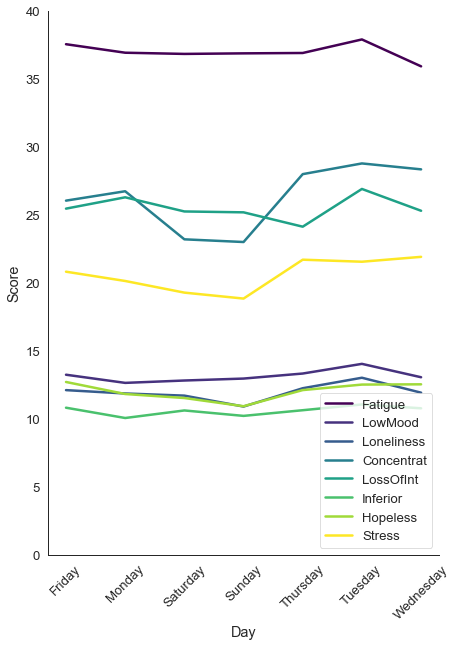

In [135]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

ax = dailyMeans.iloc[:,:-3].plot(kind="line", legend=True, cmap='viridis', figsize = (7,10))
ax.legend(loc=4)
ax.set_ylim([0,40])
ax.set_ylabel("Score")
plt.xticks(rotation=45)

sns.despine()
plt.savefig('../../figures/ESM_quest-var-line.png')

In [134]:
pwd

'/Users/danalclop/Dropbox/Research/AISaturdays-depresion-rrss/scripts/extra'

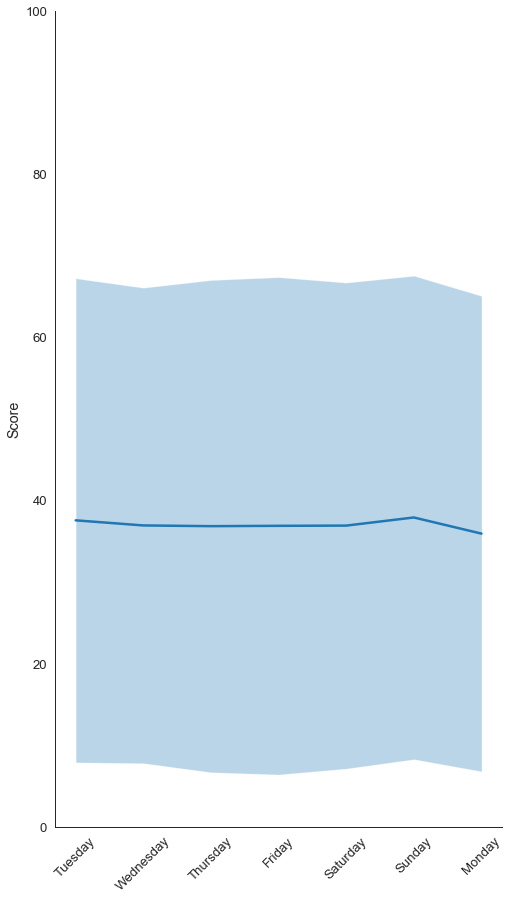

In [139]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(8)

fields = ['Fatigue']

with sns.axes_style("white"):
    days = list(data.Day.unique())
    for field in fields:
        meanst = np.array(data.groupby(["Day"])[field].mean().values, dtype=np.float64)
        sdt = np.array(data.groupby(["Day"])[field].std().values, dtype=np.float64)
        ax.plot(days, meanst)
        ax.fill_between(days, meanst-sdt, meanst+sdt ,alpha=0.3)

ax.set_ylim([0,100])
ax.set_ylabel("Score")
plt.xticks(rotation=45)

sns.despine()
plt.savefig('../../figures/TEST_Fatigue-varCI-line.png')

In [7]:
for column in dailyMeans.columns:
    print(column, dailyMeans.loc[:,column].max() - dailyMeans.loc[:,column].min())

Fatigue 1.9798305001594443
LowMood 1.3992155729086626
Loneliness 2.1203201313032327
Concentrat 5.782373656492261
LossOfInt 2.7768333237773035
Inferior 0.9974514793851377
Hopeless 1.784970276409366
Stress 3.0708119043687567
PSMU 6.129405816248308
News 3.0119218678602273
ASMU 5.417096095972298


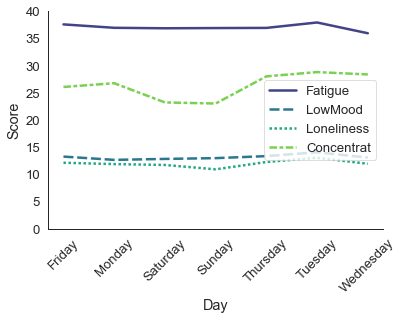

In [75]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

ESM_quest = dailyMeans.iloc[:,:4]
ax = sns.lineplot(data=ESM_quest, palette='viridis', sizes=(5, 10)) # , x=, y=
ax.set_ylim([0,40])
ax.set_ylabel("Score")
plt.xticks(rotation=45)
sns.despine()